# Lending Club Case Study
Team : Raina Sharma & Rahul Madan <br>
Date : 10th November 2021

#### Business Objective :
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [222]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.core.display import HTML

warnings.filterwarnings("ignore")
%matplotlib inline

In [223]:
#read the dataset and check the first five rows
pd.set_option("display.max_columns", 111)## For viewing the columns in this notebook.
loan_df=pd.read_csv("loan.csv", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [224]:
#Check the shape of the dataframe
loan_df.shape

(39717, 111)

### Data Handling and Cleaning

In [225]:
# Considering only those columns which have null values less than 40% in that particular column
loan_df = loan_df[loan_df.columns[((loan_df.isnull().sum())/len(loan_df)) < 0.4]]
loan_df.shape

(39717, 54)

In [226]:
## Checking columns having unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [227]:
## Dropping the columns having just one unique value
loan_df = loan_df.loc[:,loan_df.nunique() != 1]
loan_df.shape

(39717, 45)

In [228]:
## Observing columns in the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [229]:
## Dropping unnecessary columns
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","desc","emp_title","title"]
loan_df.drop(columns=del_cols, inplace=True)
loan_df.shape

(39717, 28)

In [230]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [231]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2).sort_values(ascending=False)

emp_length              2.71
pub_rec_bankruptcies    1.75
revol_util              0.13
addr_state              0.00
total_pymnt_inv         0.00
total_pymnt             0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
inq_last_6mths          0.00
earliest_cr_line        0.00
delinq_2yrs             0.00
dti                     0.00
loan_amnt               0.00
funded_amnt             0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
term                    0.00
funded_amnt_inv         0.00
purpose                 0.00
dtype: float64

In [245]:
loan_df.emp_length.value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [246]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [247]:
loan_df.revol_util.value_counts()

0%        1027
0.20%       63
63%         62
0.10%       58
40.70%      58
          ... 
9.34%        1
4.85%        1
17.71%       1
70.94%       1
17.67%       1
Name: revol_util, Length: 1089, dtype: int64

In [248]:
#replacing the missing values with mode value.
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True) ## Since most of the values are MzEzddNNNWrRokVav




## Handling Data Types

In [250]:
# Analyze the data types of each column
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
pub_rec_bankruptcies    float64
dtype: object

Now we will analyze each column in the dataframe to get more clarity of the type of values it has. We will fix the data for the purpose of study and will create derived columns as required.

In [251]:
# term column
loan_df["term"].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [252]:
# Changes in the term column. Replace " months" in the term
loan_df['term_months'] = loan_df['term'].str.rstrip('months')
del loan_df['term']

In [253]:
# int_rate column
loan_df["int_rate"].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
24.59%      1
16.20%      1
16.15%      1
22.64%      1
24.40%      1
Name: int_rate, Length: 371, dtype: int64

In [254]:
# Changes in the int_rate column. Replace "%" associated with the interest rate
loan_df['int_rate_percentage'] = loan_df['int_rate'].str.rstrip('%')
del loan_df['int_rate']

In [255]:
# emp_length column
loan_df["emp_length"].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [256]:
# Changes in emp_length column. Remove years associated with the value.
loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip('years ')
loan_df['emp_length_years'].replace({'10+': '10'}, inplace=True)
loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'
del loan_df['emp_length']

In [257]:
# home_ownership column
loan_df["home_ownership"].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [258]:
# Changes in home_ownership column. Replace None with Other
loan_df['home_ownership']=loan_df['home_ownership'].replace('NONE', 'OTHER')

In [259]:
# annual_inc column
loan_df["annual_inc"].value_counts()

60000.0     1505
50000.0     1057
40000.0      876
45000.0      830
30000.0      825
            ... 
112008.0       1
64704.0        1
61938.0        1
49668.0        1
140900.0       1
Name: annual_inc, Length: 5318, dtype: int64

In [142]:
# Creating derived metrics -- Loan to income ratio
loan_df['loan_income_ratio']= loan_df['loan_amnt']/loan_df['annual_inc']

In [260]:
# verification_status column
loan_df["verification_status"].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [261]:
# issue_d column
loan_df["issue_d"].value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [262]:
# create two new columns of month and year from issue date.
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df[
    'issue_d'].str.split('-').str

In [263]:
# convert issue_date_year to four digit year
loan_df['issue_d_year'] = '20' + loan_df['issue_d_year']
del loan_df['issue_d']

In [301]:
# loan_status column
loan_df["loan_status"].value_counts()

5627

In [265]:
# purpose column
loan_df["purpose"].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [266]:
# addr_state column
loan_df["addr_state"].value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [267]:
## revol_util
loan_df["revol_util"].value_counts()

0%        1027
0.20%       63
63%         62
0.10%       58
40.70%      58
          ... 
9.34%        1
4.85%        1
17.71%       1
70.94%       1
17.67%       1
Name: revol_util, Length: 1089, dtype: int64

In [268]:
# Replace % in columns
loan_df['revol_util_percentage'] = loan_df['revol_util'].str.rstrip('%')
del loan_df['revol_util']

#### Changing Data types of the column

In [269]:
# Change datatype of these columns to float
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'total_pymnt', 'total_pymnt_inv',  'int_rate_percentage',
          'revol_util_percentage']
loan_df[columns] = loan_df[columns].astype(np.float)

In [270]:
# Change datatype of these columns to int
columns = ['total_acc', 'term_months', 'issue_d_year']
loan_df[columns] = loan_df[columns].astype(np.int)

In [271]:
# Change datatype of these columns to category
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
loan_df[columns] = loan_df[columns].apply(lambda x: x.astype('category'))

In [272]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,issue_d_month,issue_d_year,revol_util_percentage
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,9,5863.155187,5833.84,0.0,36,10.65,10.0,Dec,2011,83.7
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,4,1008.710000,1008.71,0.0,60,15.27,0.5,Dec,2011,9.4
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,10,3005.666844,3005.67,0.0,36,15.96,10.0,Dec,2011,98.5
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,37,12231.890000,12231.89,0.0,36,13.49,10.0,Dec,2011,21.0
4,3000.0,3000.0,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,Jan-96,0,15,0,27783.0,38,3513.330000,3513.33,0.0,60,12.69,1.0,Dec,2011,53.9


#### Find outliers and remove them from data

In [273]:
loan_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,term_months,int_rate_percentage,emp_length_years,issue_d_year,revol_util_percentage
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,13382.528086,22.088828,12153.596544,11567.149118,42.418007,12.021177,5.167195,2010.328902,48.770677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,15885.016641,11.401709,9042.040766,8942.672613,10.622815,3.724825,3.528418,0.877514,28.367689
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,36.000000,5.420000,0.500000,2007.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,3703.000000,13.000000,5576.930000,5112.310000,36.000000,9.250000,2.000000,2010.000000,25.300000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,8850.000000,20.000000,9899.640319,9287.150000,36.000000,11.860000,5.000000,2011.000000,49.200000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,17058.000000,29.000000,16534.433040,15798.810000,60.000000,14.590000,10.000000,2011.000000,72.300000
90%,22000.000000,21000.000000,20000.000000,622.952000,1.160000e+05,22.330000,29144.400000,38.000000,24775.362578,24083.702000,60.000000,16.890000,10.000000,2011.000000,87.800000
95%,25000.000000,25000.000000,24736.572264,762.996000,1.420000e+05,23.840000,41656.400000,43.000000,30245.118530,29627.236000,60.000000,18.540000,10.000000,2011.000000,93.500000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,90.000000,58563.679930,58563.680000,60.000000,24.590000,10.000000,2011.000000,99.900000


##### Observation: The maximum value is almost 100 times more than the mean value for annual income

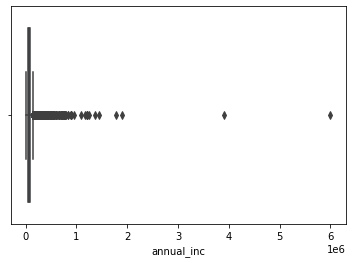

In [157]:
# Checking outliers in each column
sns.boxplot(loan_df['annual_inc'])
plt.show()

In [158]:
income = np.percentile(loan_df['annual_inc'], [5,95])

<AxesSubplot:xlabel='annual_inc'>

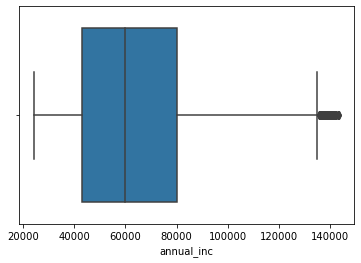

In [159]:
loan_df = loan_df[(loan_df.annual_inc > income[0]) & (loan_df.annual_inc < income[1])]

sns.boxplot(data=loan_df,x='annual_inc')

In [274]:
loan_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,total_acc,total_pymnt,total_pymnt_inv,term_months,int_rate_percentage,emp_length_years,issue_d_year,revol_util_percentage
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,13382.528086,22.088828,12153.596544,11567.149118,42.418007,12.021177,5.167195,2010.328902,48.770677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,15885.016641,11.401709,9042.040766,8942.672613,10.622815,3.724825,3.528418,0.877514,28.367689
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,36.000000,5.420000,0.500000,2007.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,3703.000000,13.000000,5576.930000,5112.310000,36.000000,9.250000,2.000000,2010.000000,25.300000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,8850.000000,20.000000,9899.640319,9287.150000,36.000000,11.860000,5.000000,2011.000000,49.200000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,17058.000000,29.000000,16534.433040,15798.810000,60.000000,14.590000,10.000000,2011.000000,72.300000
90%,22000.000000,21000.000000,20000.000000,622.952000,1.160000e+05,22.330000,29144.400000,38.000000,24775.362578,24083.702000,60.000000,16.890000,10.000000,2011.000000,87.800000
95%,25000.000000,25000.000000,24736.572264,762.996000,1.420000e+05,23.840000,41656.400000,43.000000,30245.118530,29627.236000,60.000000,18.540000,10.000000,2011.000000,93.500000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,90.000000,58563.679930,58563.680000,60.000000,24.590000,10.000000,2011.000000,99.900000


### Reusable functions

In [281]:
#Show labels in bar plots - copied from https://stackoverflow.com/a/48372659
def showLabels(ax, d):
    #plt.margins(0.1, 0.1)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()  
    counts = {}
    if type(d) is not float:
        for key, value in d.items():
            counts[str(key)] = value
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if type(d) is float:
            label = '{}'.format(str(round(y_value*100/d,2)) + "%")
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    return ax

In [340]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(10, 4))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 16))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return showLabels(ax,total)

def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().sort_values().plot.bar(color=sns.color_palette('pastel', 16))
        showLabels(ax,float(len(df)))
    plt.tight_layout()


def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 'Charged Off')].groupby([plotby]).loan_status.count()
    #print(charged_off)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = charged_off * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()
    
def plot_fully_paid(dataframe,plotby):
    fully_paid=dataframe.loc[(dataframe.loan_status== 'Fully Paid')].groupby([plotby]).loan_status.count()
    #print(fully_paid)
    totalcount = dataframe.groupby(plotby).loan_status.count()

    #print(totalcount)
    percentages = fully_paid * 100 / totalcount
    # print (percentages)

    #print (percentages.loc[0])
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('fully_paid % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()

## Now after cleaning the data we will proceed with EDA

In [275]:
## Drop rows with loan_status==current
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.loan_status = loan_df.loan_status.cat.remove_categories('Current') ## removing category

In [284]:
loan_df.reset_index(drop=True, inplace=True)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,issue_d_month,issue_d_year,revol_util_percentage
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648.0,9,5863.155187,5833.84,0.0,36,10.65,10.0,Dec,2011,83.7
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687.0,4,1008.710000,1008.71,0.0,60,15.27,0.5,Dec,2011,9.4
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956.0,10,3005.666844,3005.67,0.0,36,15.96,10.0,Dec,2011,98.5
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598.0,37,12231.890000,12231.89,0.0,36,13.49,10.0,Dec,2011,21.0
4,5000.0,5000.0,5000.0,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963.0,12,5632.210000,5632.21,0.0,36,7.90,3.0,Dec,2011,28.3


### Univariate Analysis

#### Loan_status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

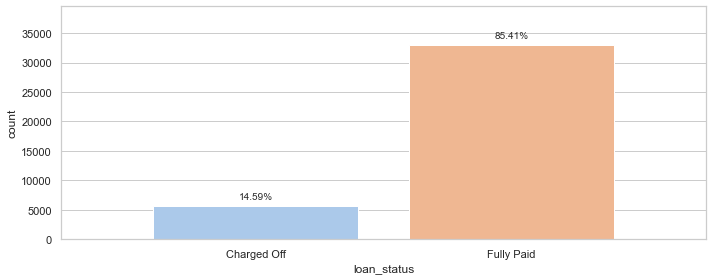

In [285]:
count_plot(loan_df,'loan_status')

##### Observation
    As we can see , 85% of the loans are successfully paid and only 15% of the loans are defaulted

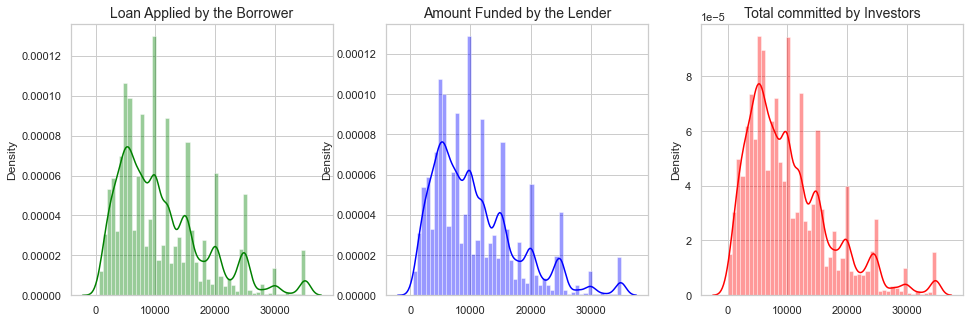

In [289]:

figure, axis = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loan_df["loan_amnt"].values, ax=axis[0], color="green")
axis[0].set_title("Loan Applied by the Borrower", fontsize=14)

sns.distplot(loan_df["funded_amnt"].values, ax=axis[1], color="blue")
axis[1].set_title("Amount Funded by the Lender", fontsize=14)

sns.distplot(loan_df["funded_amnt_inv"].values, ax=axis[2], color="red")
axis[2].set_title("Total committed by Investors", fontsize=14)


plt.show()

#### Observation
    - Loan\Funded\Committed amounts see a spike around each 5000 boundary.

In [295]:
loan_df.groupby('loan_status')['funded_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,11753.398792,7760.516335,900.0,5575.0,10000.0,16000.0,35000.0
Fully Paid,32950.0,10618.520486,6956.047888,500.0,5050.0,9200.0,14500.0,35000.0


<AxesSubplot:xlabel='funded_amnt', ylabel='loan_status'>

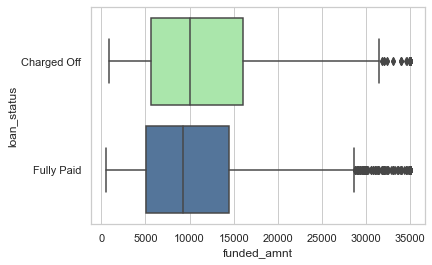

In [296]:
sns.boxplot(x=loan_df['funded_amnt'], y = loan_df['loan_status'], data=loan_df)


## Assumption : Considering Funded Amount for analysis as that is the actual loan amount funded
#### Observation:
    - Overall, the funded ammont distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 16000 (75 percentile value)
    - Charged off loans have higher average of funded amount than the paid off loans.

<AxesSubplot:xlabel='funded_amnt_bins', ylabel='count'>

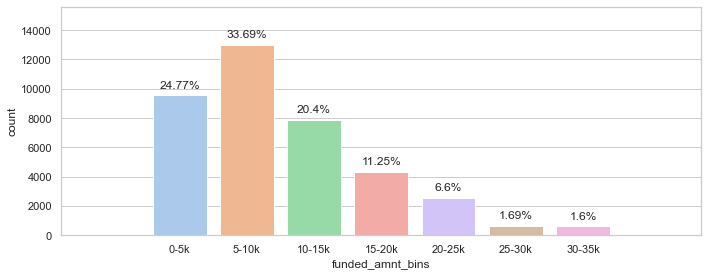

In [310]:
#Funded amount bin
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], 
                                      [x for x in range(0, 40000, 5000)], labels=[str(y)+'-'+str(y+5)+'k' for y in range (0, 35, 5)])

count_plot(loan_df,'funded_amnt_bins')

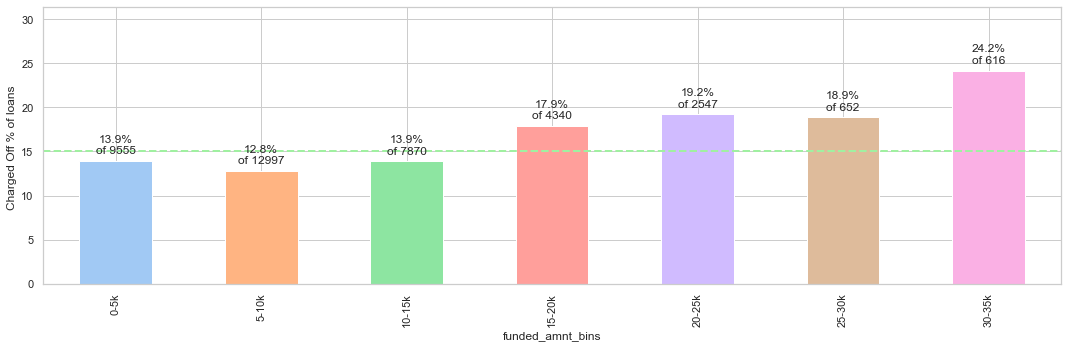

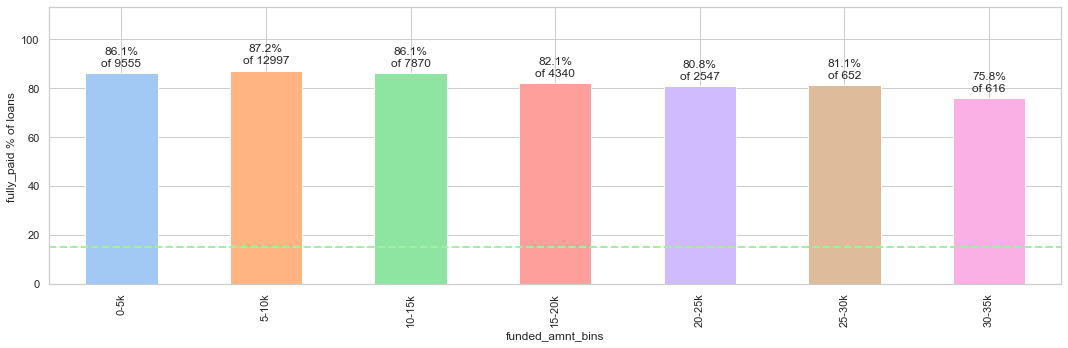

In [341]:
plot_charged_off(loan_df,'funded_amnt_bins')
plot_fully_paid(loan_df,'funded_amnt_bins')


#### Observation
    - The % of charged off loans increases substancially with increase in funded amount. 

In [315]:
loan_df.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
installment               float64
grade                    category
sub_grade                category
home_ownership           category
annual_inc                float64
verification_status      category
loan_status              category
purpose                  category
addr_state               category
dti                       float64
delinq_2yrs              category
earliest_cr_line           object
inq_last_6mths           category
open_acc                 category
pub_rec                  category
revol_bal                 float64
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
pub_rec_bankruptcies     category
term_months                 int64
int_rate_percentage       float64
emp_length_years          float64
issue_d_month              object
issue_d_year                int64
revol_util_percentage     float64
funded_amnt_bi

#### Grade & Sub-Grade

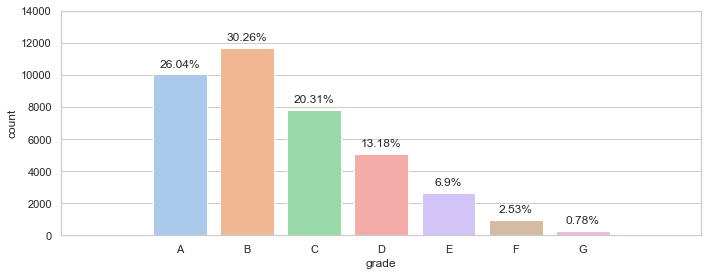

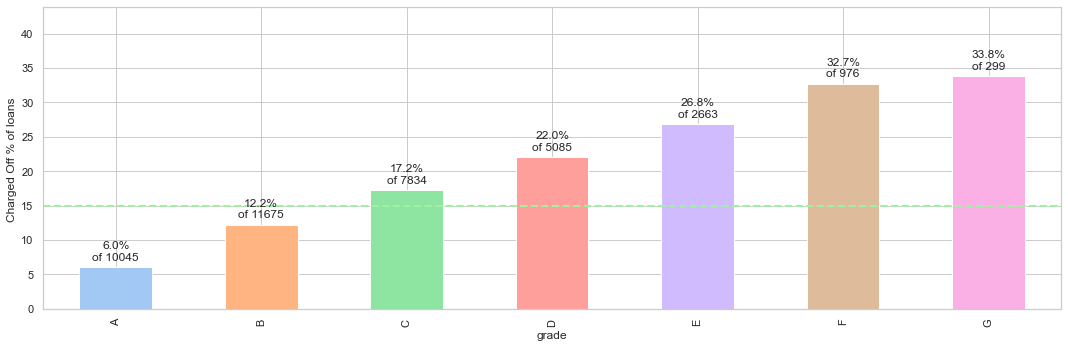

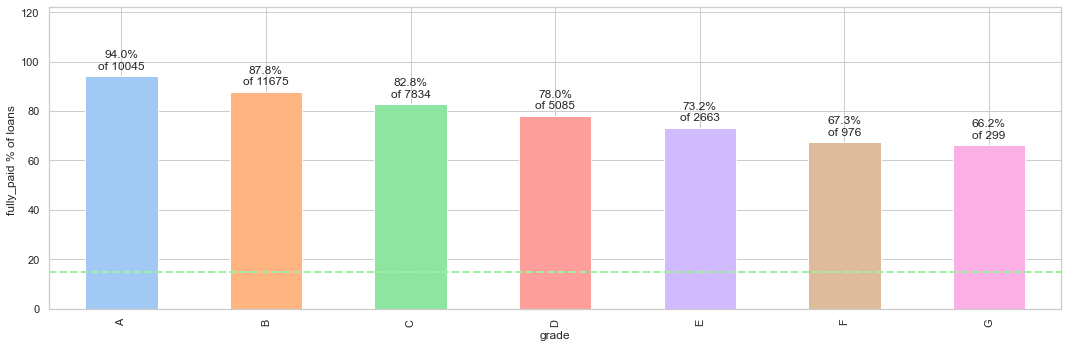

In [344]:
count_plot(loan_df,'grade')
plot_charged_off(loan_df,'grade')
plot_fully_paid(loan_df,'grade')

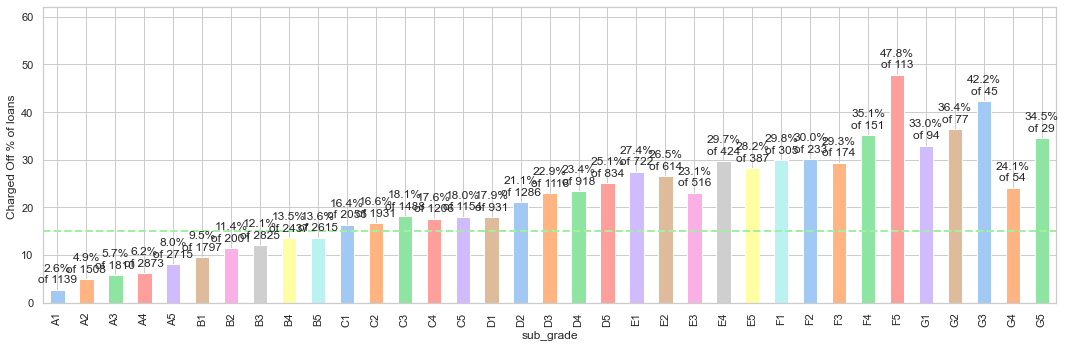

In [345]:
plot_charged_off(loan_df,'sub_grade')


#### Observation: 
    - Chances of defaulting increases with grade from A to G and subgrade from A1-A5, B1-B5, & so forth
    

####  Home Ownership

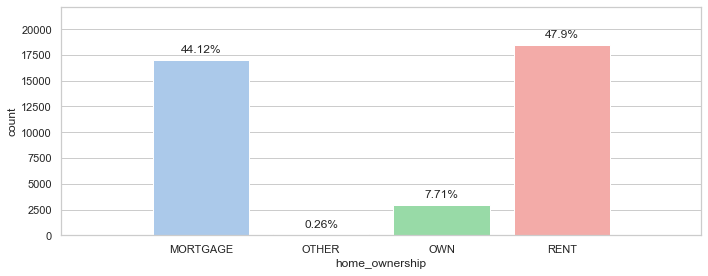

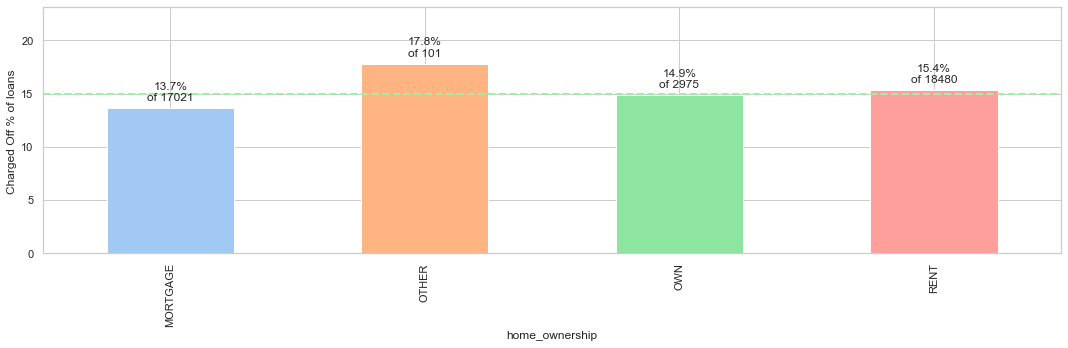

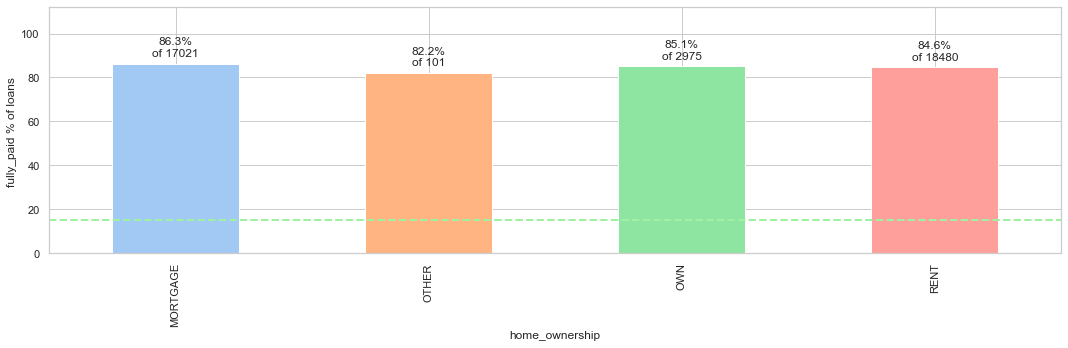

In [347]:
count_plot(loan_df,'home_ownership')
plot_charged_off(loan_df,'home_ownership')
plot_fully_paid(loan_df,'home_ownership')

#### Observation: 
    - People with ownership type as Mortgage and Rent are the most who take loans.
    

####  Verification status

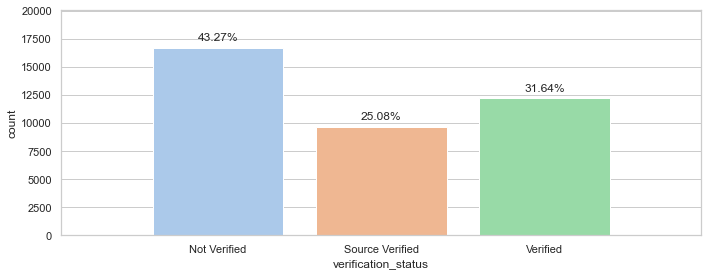

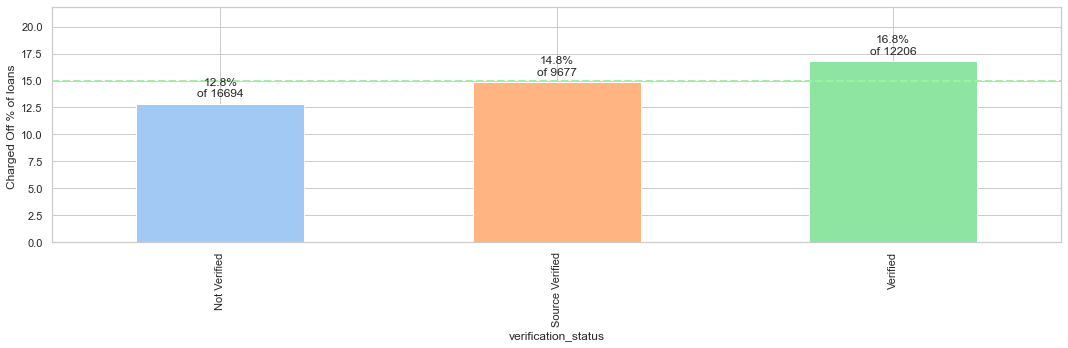

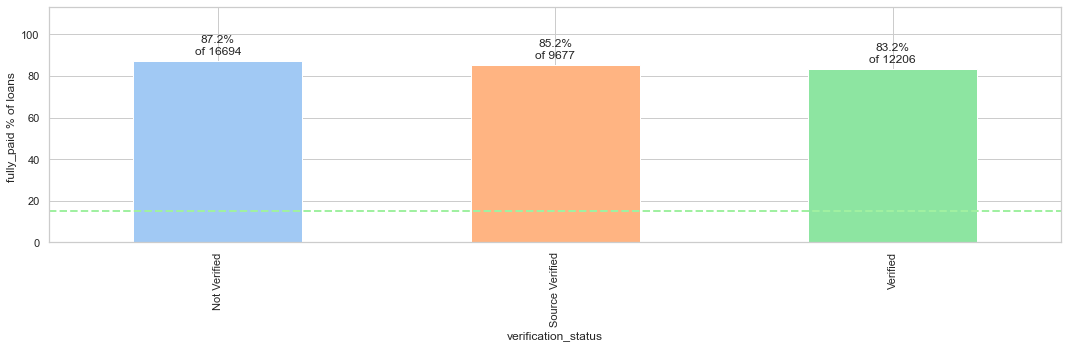

In [348]:
count_plot(loan_df,'verification_status')
plot_charged_off(loan_df,'verification_status')
plot_fully_paid(loan_df,'verification_status')

#### Observation: 
    - Majority of people taking loans are not verified
    - Chances of Defaulting is higher even with the verified verification status.
    

####  purpose

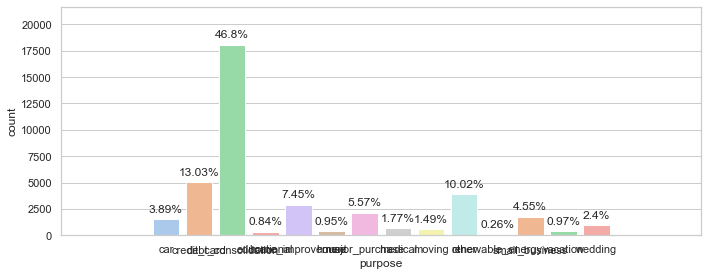

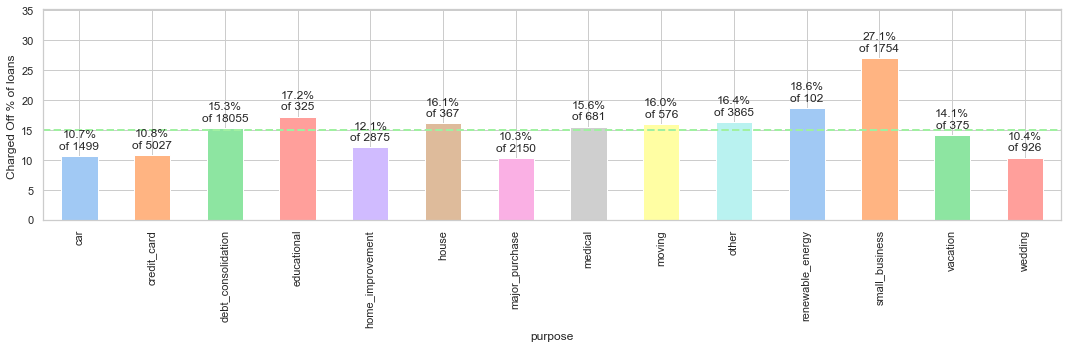

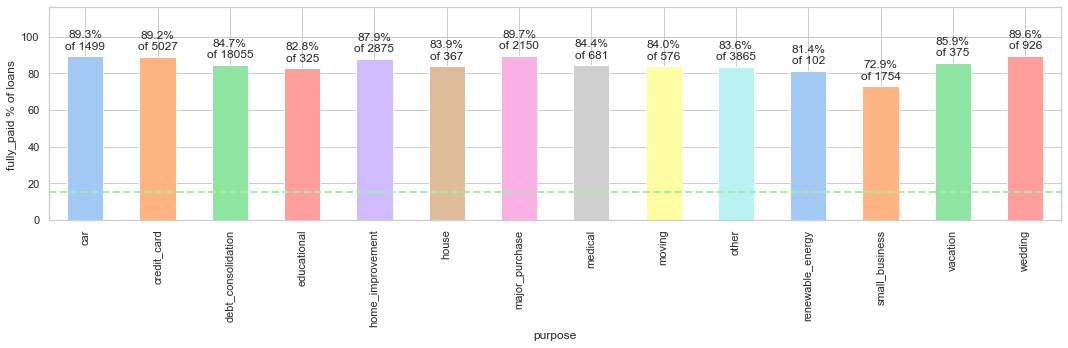

In [351]:
count_plot(loan_df,'purpose')
plot_charged_off(loan_df,'purpose')
plot_fully_paid(loan_df,'purpose')

#### Observation: 
    - Majority of people taking loans have credit card or debt consolidation as purpose.
    - Default rate is higher for small business, renewable energy, educational categories.
    

####  Borower State

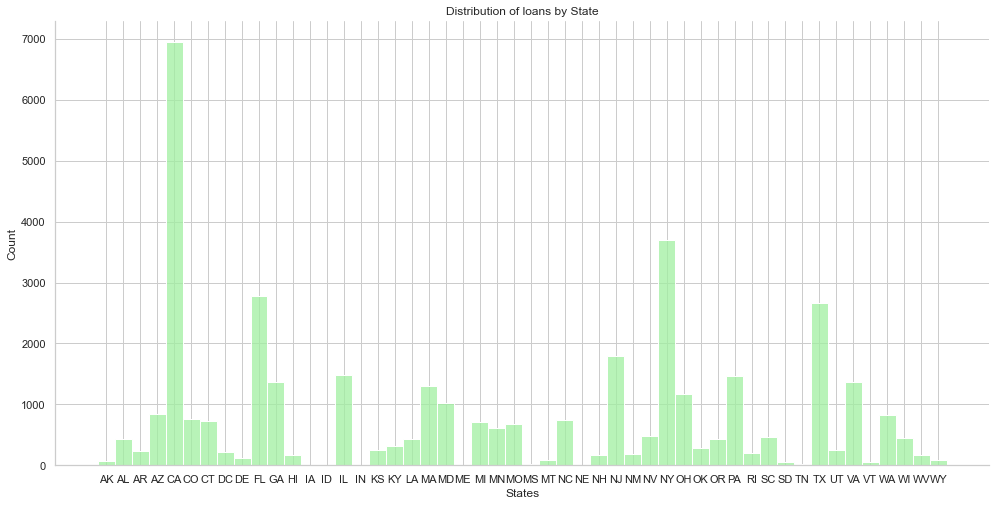

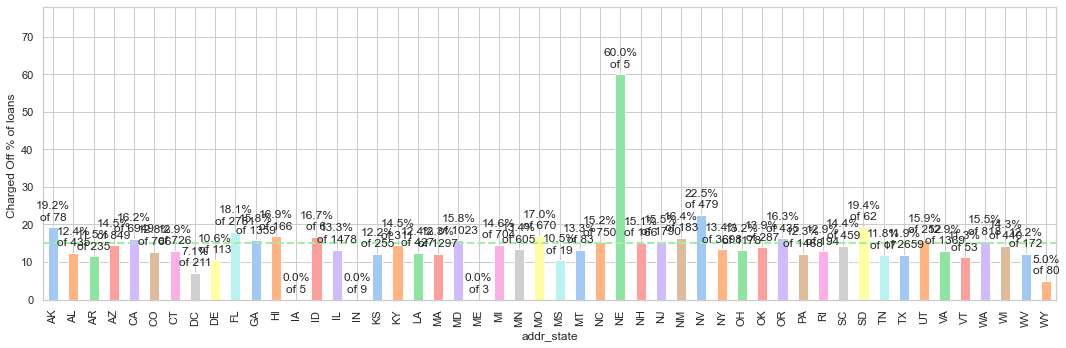

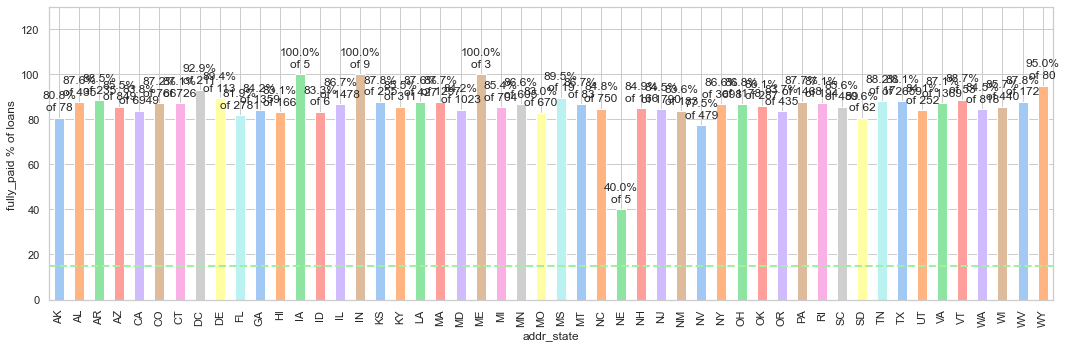

In [353]:
sns.displot(loan_df.addr_state,height=7,aspect=2)
plt.title('Distribution of loans by State')
plt.xlabel('States')
plt.show()

plot_charged_off(loan_df,'addr_state')
plot_fully_paid(loan_df,'addr_state')

#### Observation: 
    - Most of the borrowers are from California, Newyork, Florida
    - Although Nebraska(NE) has high default rate but we can ignore since there are very isignificant borrowers. New York has high default rate and with significant % of borrowers. 

<AxesSubplot:xlabel='grade'>

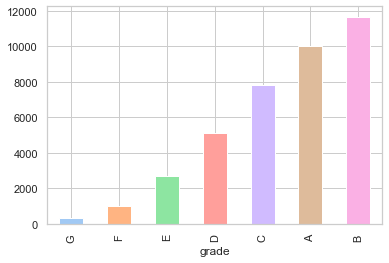

In [336]:
loan_df.groupby('grade').loan_amnt.count().sort_values().plot.bar(color=sns.color_palette('pastel', 16))

In [ ]:
emp_length
Majority of people applying for loans are not verified
Although Majority of default loans are from not verfied, but the default rate is higher when it comes to Verified Source

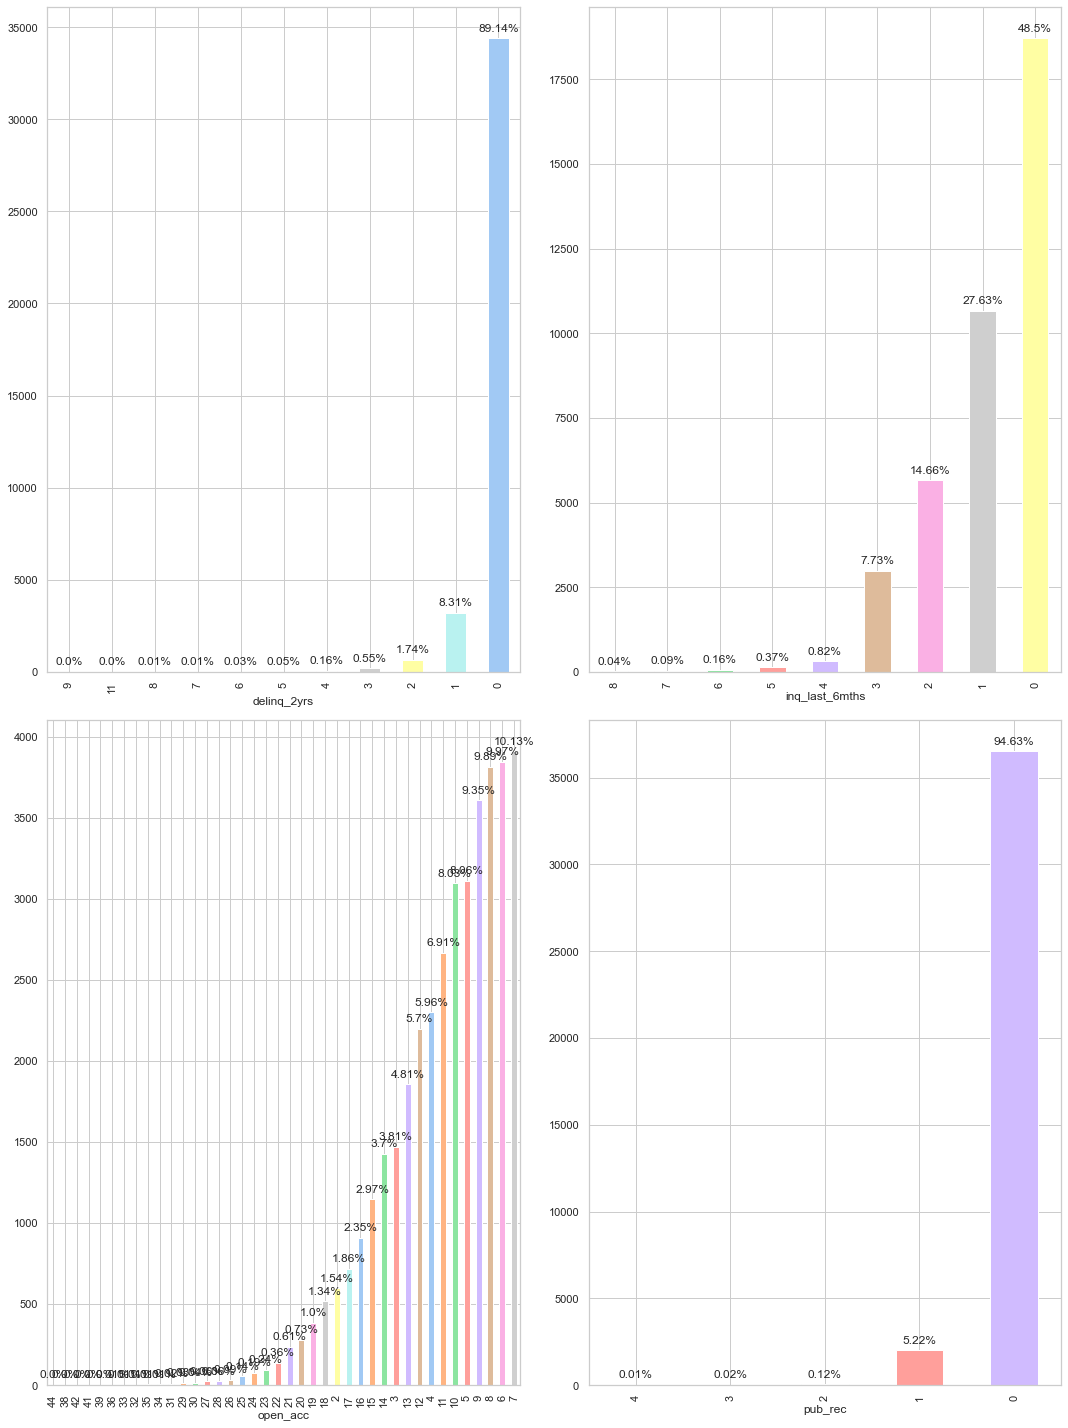

In [355]:
category_columns_list=['delinq_2yrs','inq_last_6mths','open_acc','pub_rec']
plt.figure(figsize=(15,20))
categoricalBarPlots(loan_df, category_columns_list)

### These variables will be used in below analysis
colors = ["#A0F0A1","#4974a5"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
order = ['Fully Paid','Charged Off']

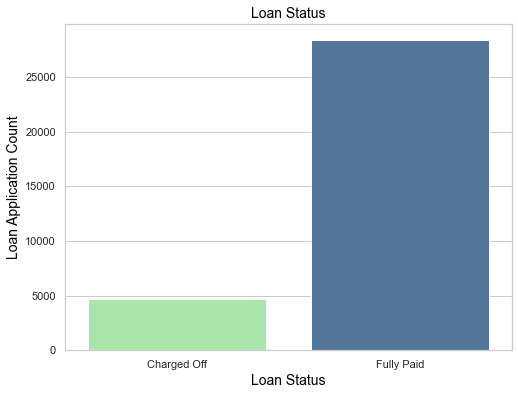

In [181]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="loan_status",data=loan_df)
ax.set_title('Loan Status',fontsize=14,color='black')
ax.set_xlabel('Loan Status',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')  
plt.show()


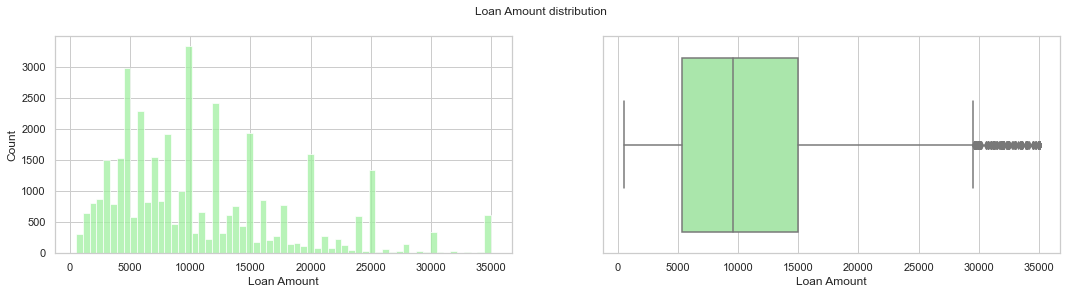

In [278]:
## univariate analysis for loan_amnt
plt.figure(figsize=(18,4))
plt.suptitle('Loan Amount distribution')
plt.subplot(1,2,1)
##plotting the histplot to check the distribution of the loan_amnt
sns.histplot(data=loan_df, x="loan_amnt")
plt.xlabel('Loan Amount')
plt.subplot(1,2,2)
##plotting the boxplot to check the IQR 
sns.boxplot(x=loan_df.loan_amnt)
plt.xlabel('Loan Amount')
plt.show()


In [280]:
loan_df.loan_amnt.median()

9600.0

### Observation :
 - median of the loan ammount is ~10k or $9600
 - Q1/Q2 range is between 5k to 15k

Categorical columns that will help in analysis

### Univariate Analysis

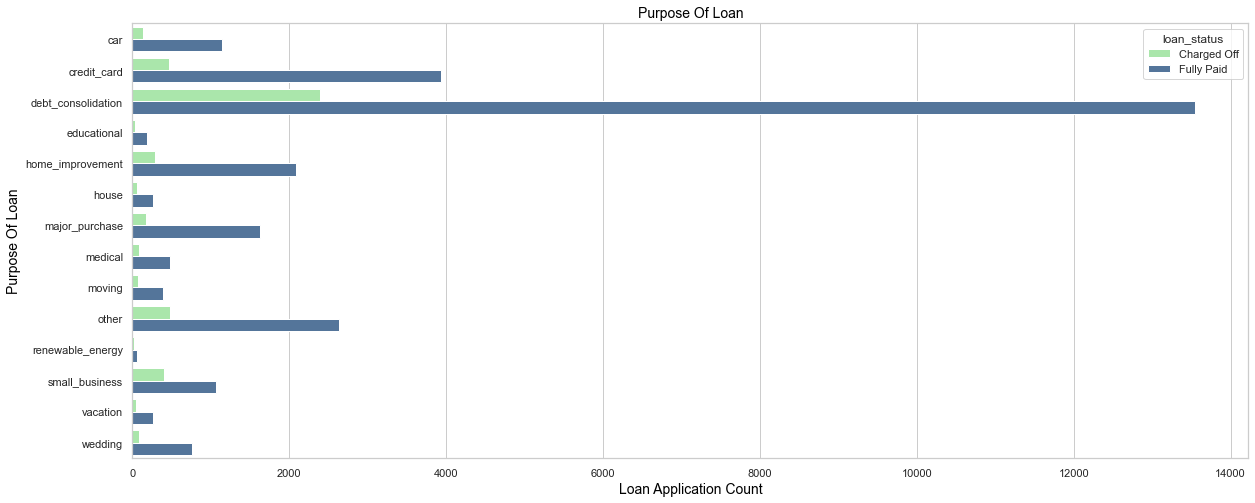

In [196]:
# Purpose Of Loan

plt.figure(figsize=(20,8))
ax = sns.countplot(y="purpose",data=loan_df,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='black')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'black')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'black')   
plt.show()

# Observations :
# Most of the charged off loans were taken for the purpose of debt consolidation and credit card payment 

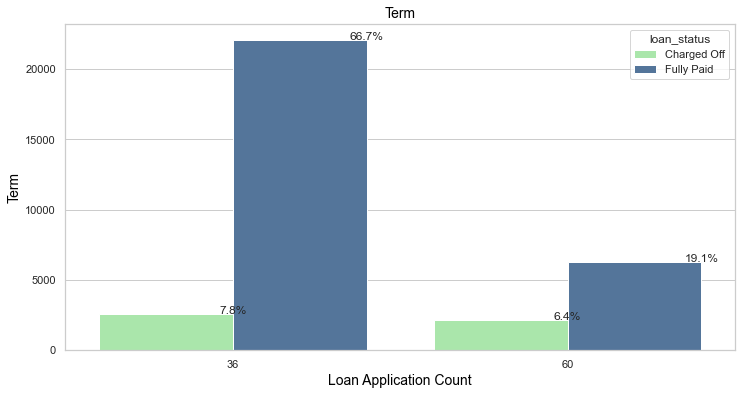

In [190]:
# Term

plt.figure(figsize=(12,6))
ax = sns.countplot(x="term_months",data=loan_df,hue='loan_status')
ax.set_title('Term',fontsize=14,color='black')
ax.set_ylabel('Term',fontsize=14,color = 'black')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'black')  
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/float(len(loan_df)))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Observations :
# 

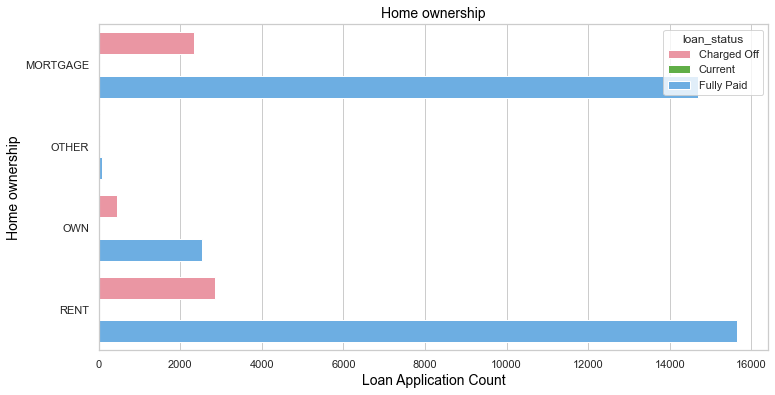

In [50]:
# Home ownership

plt.figure(figsize=(12,6))
ax = sns.countplot(y="home_ownership",data=loan_df,hue='loan_status')
ax.set_title('Home ownership',fontsize=14,color='black')
ax.set_ylabel('Home ownership',fontsize=14,color = 'black')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'black')      
plt.show()

# Observations :
# Most of the charged off loans were taken by people with rented or mortgaged home

In [51]:
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan_df['loan_amnt_categories'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])


In [52]:

res=pd.pivot_table(data=loan_df,columns='loan_amnt_categories', aggfunc=np.sum, index='loan_status',values='loan_amnt')

In [53]:
def Univariate_Categorical_Plot (*, data=loan_df, column, title):

        fig, ax = plt.subplots(figsize=(10,8))
        sns.countplot(data=data, y=column, hue='loan_status', ax=ax, 
                      order=data[column].value_counts().index, hue_order=order)
        
        plt.title(title)
        plt.show() 

In [60]:
def Univariate_Categorical_Table (*, data=loan_df, column, title):
        
        df = loan_df.groupby([column])['loan_status'].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df['loan_status']=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=['loan_status'])
        df2 = loan_df.groupby([column])['loan_status'].count()
        df = df.merge(right=df2,on=column).rename(columns={'loan_status':'Record count'})
        display(HTML(df.to_html(index=False))) 

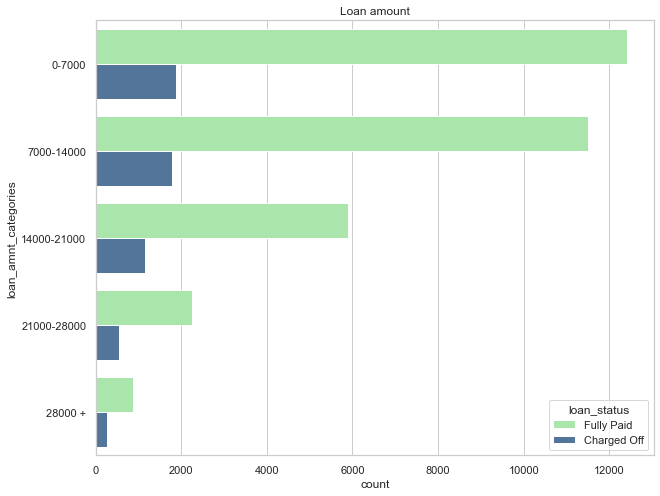

In [58]:
Univariate_Categorical_Plot(column='loan_amnt_categories',title='Loan amount')

In [61]:
Univariate_Categorical_Table(column='loan_amnt_categories',title='Loan amount')

loan_amnt_categories,Charged off %,Record count
28000 +,0.228747,1141
21000-28000,0.192832,2790
14000-21000,0.164039,7041
7000-14000,0.134306,13298
0-7000,0.131893,14307


### Bivariate Analysis